<a href="https://colab.research.google.com/github/RantiMaulidaningsih/Math_ML/blob/main/Not_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

open git repositori

In [1]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import shutil
import glob
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import splitfolders

In [3]:
!git clone https://github.com/rli1215/Recycling-Image-Classification.git

Cloning into 'Recycling-Image-Classification'...
remote: Enumerating objects: 2985, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 2985 (delta 47), reused 24 (delta 14), pack-reused 2902
Receiving objects: 100% (2985/2985), 145.06 MiB | 42.92 MiB/s, done.
Resolving deltas: 100% (70/70), done.
Updating files: 100% (2729/2729), done.


In [4]:
#download data dari github
!git clone https://github.com/RantiMaulidaningsih/TrashBox-testandvalid.git

Cloning into 'TrashBox-testandvalid'...
remote: Enumerating objects: 6508, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 6508 (delta 3), reused 14 (delta 2), pack-reused 6490
Receiving objects: 100% (6508/6508), 911.81 MiB | 27.28 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (7156/7156), done.


In [5]:
!git clone https://github.com/MLCrats/Yolov5-E-Waste-Detection.git

Cloning into 'Yolov5-E-Waste-Detection'...
remote: Enumerating objects: 922, done.
remote: Counting objects: 100% (159/159), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 922 (delta 49), reused 118 (delta 30), pack-reused 763
Receiving objects: 100% (922/922), 121.84 MiB | 24.81 MiB/s, done.
Resolving deltas: 100% (50/50), done.


data moving

In [6]:
def move_all_file (data_folder_path, path):
    for jpgpath in glob.iglob(os.path.join(data_folder_path, '*.jpg')):
      shutil.move(jpgpath, path)
      return jpgpath

In [7]:
#membuat directori untuk dimodelkan 
!mkdir ./data
!mkdir ./data/e-waste
!mkdir ./data/waste
!mkdir ./e-waste_filtered

Masukin data e-waste ke direktori 

In [8]:
ewaste_1= '/content/TrashBox-testandvalid/TrashBox_testandvalid_set/test/e-waste'
ewaste_2= '/content/Recycling-Image-Classification/dataset-resized/ewaste'
ewaste_3= '/content/Yolov5-E-Waste-Detection/Dataset/train/images'
ewaste_4= '/content/TrashBox-testandvalid/TrashBox_testandvalid_set/val/e-waste'
ewaste_5= '/content/Yolov5-E-Waste-Detection/Dataset/val/images'
ewaste_6= '/content/Yolov5-E-Waste-Detection/Dataset/test/images'
e_waste = len(os.listdir(ewaste_1)) + len(os.listdir(ewaste_2)) + len(os.listdir(ewaste_3)) + len(os.listdir(ewaste_4)) + len(os.listdir(ewaste_5)) + len(os.listdir(ewaste_6))
print(f'{len(os.listdir(ewaste_1))}, {len(os.listdir(ewaste_2))}, {len(os.listdir(ewaste_3))}, {len(os.listdir(ewaste_4))}, {len(os.listdir(ewaste_5))}, {len(os.listdir(ewaste_6))}, {e_waste}')

302, 320, 288, 300, 56, 56, 1322


In [9]:
path = './data/e-waste'
for i in range(len(os.listdir(ewaste_1))):
  move_all_file(ewaste_1, path)
  print(len(os.listdir(path))-1)
for i in range(len(os.listdir(ewaste_2))):
  move_all_file(ewaste_2, path)
  print(len(os.listdir(path))-1)
for i in range(len(os.listdir(ewaste_3))):
  move_all_file(ewaste_3, path)
  print(len(os.listdir(path))-1)
for i in range(len(os.listdir(ewaste_4))):
  move_all_file(ewaste_4, path)
  print(len(os.listdir(path))-1)
for i in range(len(os.listdir(ewaste_5))):
  move_all_file(ewaste_5, path)
  print(len(os.listdir(path))-1)
for i in range(len(os.listdir(ewaste_6))):
  move_all_file(ewaste_6, path)
  print(len(os.listdir(path))-1)
print(len(os.listdir(path))-1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Masukin data waste ke derektori

In [10]:
waste_1= '/content/Recycling-Image-Classification/dataset-resized/cardboard'
waste_2= '/content/Recycling-Image-Classification/dataset-resized/plastic'
waste_3= '/content/TrashBox-testandvalid/TrashBox_testandvalid_set/test/cardboard'
waste_4= '/content/TrashBox-testandvalid/TrashBox_testandvalid_set/test/plastic'
waste_5= '/content/TrashBox-testandvalid/TrashBox_testandvalid_set/val/cardboard'
waste_6= '/content/TrashBox-testandvalid/TrashBox_testandvalid_set/val/plastic'
waste = len(os.listdir(waste_1)) + len(os.listdir(waste_2)) + len(os.listdir(waste_3)) + len(os.listdir(waste_4)) + len(os.listdir(waste_5)) + len(os.listdir(waste_6))
print(f'{len(os.listdir(waste_1))}, {len(os.listdir(waste_2))}, {len(os.listdir(waste_3))}, {len(os.listdir(waste_4))}, {len(os.listdir(waste_5))}, {len(os.listdir(waste_6))}, {waste}')

403, 482, 242, 268, 241, 266, 1902


In [11]:
path = './data/waste'
for i in range(len(os.listdir(waste_1))):
  move_all_file(waste_1, path)
  print(len(os.listdir(path))-1)
for i in range(len(os.listdir(waste_2))):
  move_all_file(waste_2, path)
  print(len(os.listdir(path))-1)
for i in range(len(os.listdir(waste_3))):
  move_all_file(waste_3, path)
  print(len(os.listdir(path))-1)
for i in range(len(os.listdir(waste_4))):
  move_all_file(waste_4, path)
  print(len(os.listdir(path))-1)
for i in range(len(os.listdir(waste_5))):
  move_all_file(waste_5, path)
  print(len(os.listdir(path))-1)
for i in range(len(os.listdir(waste_6))):
  move_all_file(waste_6, path)
  print(len(os.listdir(path))-1)
print(len(os.listdir(path)))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [12]:
for jpgpath in glob.iglob(os.path.join('./data/waste/', '*.jpg')):
  if len(os.listdir('./data/waste')) > 1320:
    os.remove(jpgpath)
    print(len(os.listdir('./data/waste')))

1901
1900
1899
1898
1897
1896
1895
1894
1893
1892
1891
1890
1889
1888
1887
1886
1885
1884
1883
1882
1881
1880
1879
1878
1877
1876
1875
1874
1873
1872
1871
1870
1869
1868
1867
1866
1865
1864
1863
1862
1861
1860
1859
1858
1857
1856
1855
1854
1853
1852
1851
1850
1849
1848
1847
1846
1845
1844
1843
1842
1841
1840
1839
1838
1837
1836
1835
1834
1833
1832
1831
1830
1829
1828
1827
1826
1825
1824
1823
1822
1821
1820
1819
1818
1817
1816
1815
1814
1813
1812
1811
1810
1809
1808
1807
1806
1805
1804
1803
1802
1801
1800
1799
1798
1797
1796
1795
1794
1793
1792
1791
1790
1789
1788
1787
1786
1785
1784
1783
1782
1781
1780
1779
1778
1777
1776
1775
1774
1773
1772
1771
1770
1769
1768
1767
1766
1765
1764
1763
1762
1761
1760
1759
1758
1757
1756
1755
1754
1753
1752
1751
1750
1749
1748
1747
1746
1745
1744
1743
1742
1741
1740
1739
1738
1737
1736
1735
1734
1733
1732
1731
1730
1729
1728
1727
1726
1725
1724
1723
1722
1721
1720
1719
1718
1717
1716
1715
1714
1713
1712
1711
1710
1709
1708
1707
1706
1705
1704
1703
1702


In [13]:
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("./data", output="./e-waste_filtered",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=True)

Copying files: 2640 files [00:00, 18541.50 files/s]


In [34]:
!zip -r '/content/e-waste_filtered.zip' '/content/e-waste_filtered'

  adding: content/e-waste_filtered/ (stored 0%)
  adding: content/e-waste_filtered/train/ (stored 0%)
  adding: content/e-waste_filtered/train/e-waste/ (stored 0%)
  adding: content/e-waste_filtered/train/e-waste/ewaste128.jpg (deflated 5%)
  adding: content/e-waste_filtered/train/e-waste/e-waste 1055.jpg (deflated 0%)
  adding: content/e-waste_filtered/train/e-waste/ewaste245.jpg (deflated 8%)
  adding: content/e-waste_filtered/train/e-waste/e-waste 576.jpg (deflated 1%)
  adding: content/e-waste_filtered/train/e-waste/ewaste82.jpg (deflated 2%)
  adding: content/e-waste_filtered/train/e-waste/e-waste 1155.jpg (deflated 0%)
  adding: content/e-waste_filtered/train/e-waste/swi_image_27.jpg (deflated 10%)
  adding: content/e-waste_filtered/train/e-waste/e-waste 2116.jpg (deflated 2%)
  adding: content/e-waste_filtered/train/e-waste/IoT_image_35.jpg (deflated 20%)
  adding: content/e-waste_filtered/train/e-waste/e-waste 1089.jpg (deflated 0%)
  adding: content/e-waste_filtered/train/e-wa

split size

In [15]:
base_dir = './e-waste_filtered'
train_dir = os.path.join(base_dir,'train')
train_ewaste_dir = os.path.join(train_dir,'e-waste')
train_ewaste_fnames = os.listdir(train_ewaste_dir)
print('train_ewaste_fnames length:',len(train_ewaste_fnames))
train_waste_dir = os.path.join(train_dir,'waste')
train_waste_fnames = os.listdir(train_waste_dir)
print('train_waste_fnames length:',len(train_waste_fnames))

validation_dir = os.path.join(base_dir,'val')
validation_ewaste_dir = os.path.join(validation_dir,'e-waste')
validation_ewaste_fnames = os.listdir(validation_ewaste_dir)
print('validation_ewaste_fnames length:',len(validation_ewaste_fnames))
validation_waste_dir = os.path.join(validation_dir,'waste')
validation_waste_fnames = os.listdir(validation_waste_dir)
print('validation_waste_fnames length:',len(validation_waste_fnames))

test_dir = os.path.join(base_dir,'test')
test_ewaste_dir = os.path.join(test_dir,'e-waste')
test_ewaste_fnames = os.listdir(test_ewaste_dir)
print('test_ewaste_fnames length:',len(test_ewaste_fnames))
test_waste_dir = os.path.join(test_dir,'waste')
test_waste_fnames = os.listdir(test_waste_dir)
print('test_waste_fnames length:',len(test_waste_fnames))

train_ewaste_fnames length: 1056
train_waste_fnames length: 1056
validation_ewaste_fnames length: 132
validation_waste_fnames length: 132
test_ewaste_fnames length: 132
test_waste_fnames length: 132


Load data

In [16]:
%matplotlib inline

import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

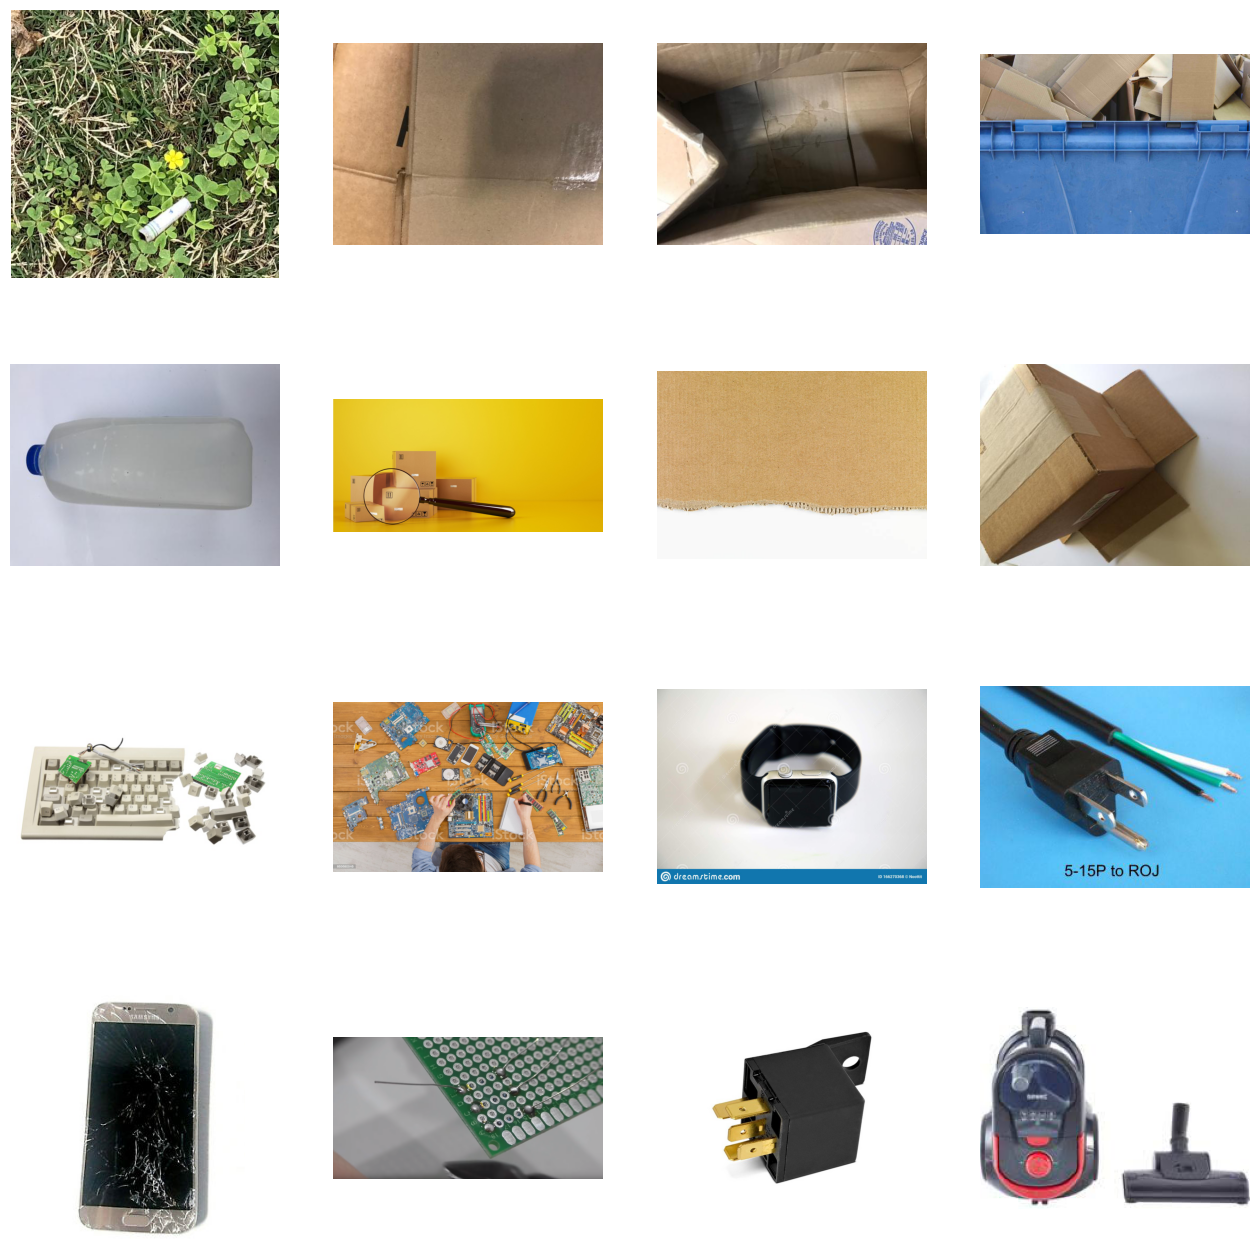

In [17]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_waste_pix = [os.path.join(train_waste_dir, fname) 
                for fname in train_waste_fnames[ pic_index-8:pic_index] 
               ]

next_ewaste_pix = [os.path.join(train_ewaste_dir, fname) 
                for fname in train_ewaste_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_waste_pix+next_ewaste_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1/255.0, 
        rotation_range=40,
        height_shift_range=0.2,
        width_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
valid_datagen  = ImageDataGenerator(rescale = 1/255.0, 
        rotation_range=40,
        height_shift_range=0.2,
        width_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
test_datagen  = ImageDataGenerator(rescale = 1/255.0)
# --------------------
# Flow training images in batches of 32 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42
)
# --------------------
# Flow validation images in batches of 32 using test_datagen generator
# --------------------
valid_generator = valid_datagen.flow_from_directory(
    directory=validation_dir,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)


Found 2112 images belonging to 2 classes.
Found 264 images belonging to 2 classes.
Found 264 images belonging to 2 classes.


In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 93312)             0         
                                                                 
 dense (Dense)               (None, 16)                1

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
History = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

<ipython-input-24-9bbc6ec18782>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  History = model.fit_generator(generator=train_generator,


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


66/66 [==============================] - 61s 759ms/step - loss: 0.7046 - accuracy: 0.6283 - val_loss: 0.5538 - val_accuracy: 0.7578
Epoch 2/10
66/66 [==============================] - 49s 735ms/step - loss: 0.5501 - accuracy: 0.7353 - val_loss: 0.4552 - val_accuracy: 0.8008
Epoch 3/10
66/66 [==============================] - 48s 730ms/step - loss: 0.5100 - accuracy: 0.7704 - val_loss: 0.4773 - val_accuracy: 0.7773
Epoch 4/10
66/66 [==============================] - 50s 753ms/step - loss: 0.4804 - accuracy: 0.7893 - val_loss: 0.4476 - val_accuracy: 0.7852
Epoch 5/10
66/66 [==============================] - 50s 755ms/step - loss: 0.4541 - accuracy: 0.7931 - val_loss: 0.3965 - val_accuracy: 0.8398
Epoch 6/10
66/66 [==============================] - 49s 745ms/step - loss: 0.4171 - accuracy: 0.8210 - val_loss: 0.3779 - val_accuracy: 0.8438
Epoch 7/10
66/66 [==============================] - 49s 743ms/step - loss: 0.4213 - accuracy: 0.8196 - val_loss: 0.3774 - val_accuracy: 0.8438
Epoch 8/10

Text(0.5, 1.0, 'Training and validation loss')

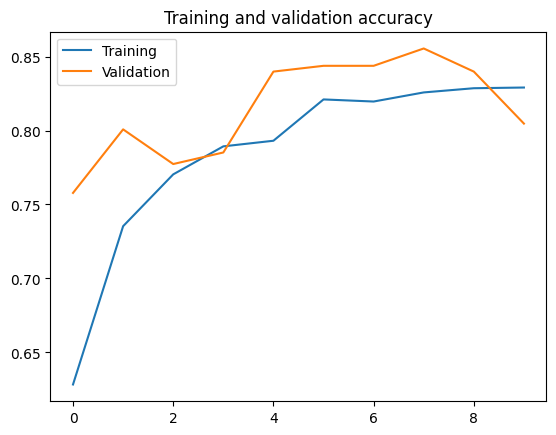

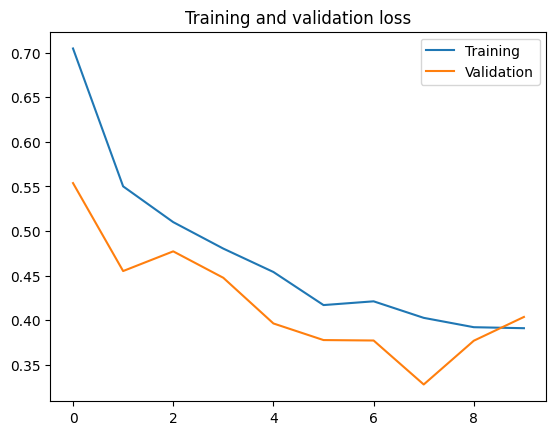

In [25]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = History.history[     'accuracy' ]
val_acc  = History.history[ 'val_accuracy' ]
loss     = History.history[    'loss' ]
val_loss = History.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

In [26]:
model.evaluate_generator(generator=valid_generator,
steps=STEP_SIZE_VALID)

<ipython-input-26-99ea6af66351>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(generator=valid_generator,


[0.3838208317756653, 0.82421875]

In [27]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

<ipython-input-27-c7201ccde5a8>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(test_generator,


264/264 [==============================] - 6s 21ms/step


In [28]:
predicted_class_indices=np.argmax(pred,axis=1)

In [29]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [30]:
labels

{0: 'e-waste', 1: 'waste'}

In [31]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

Saving b-plastic-a-20190613.jpg to b-plastic-a-20190613.jpg
1/1 [==============================] - 0s 18ms/step
0.00


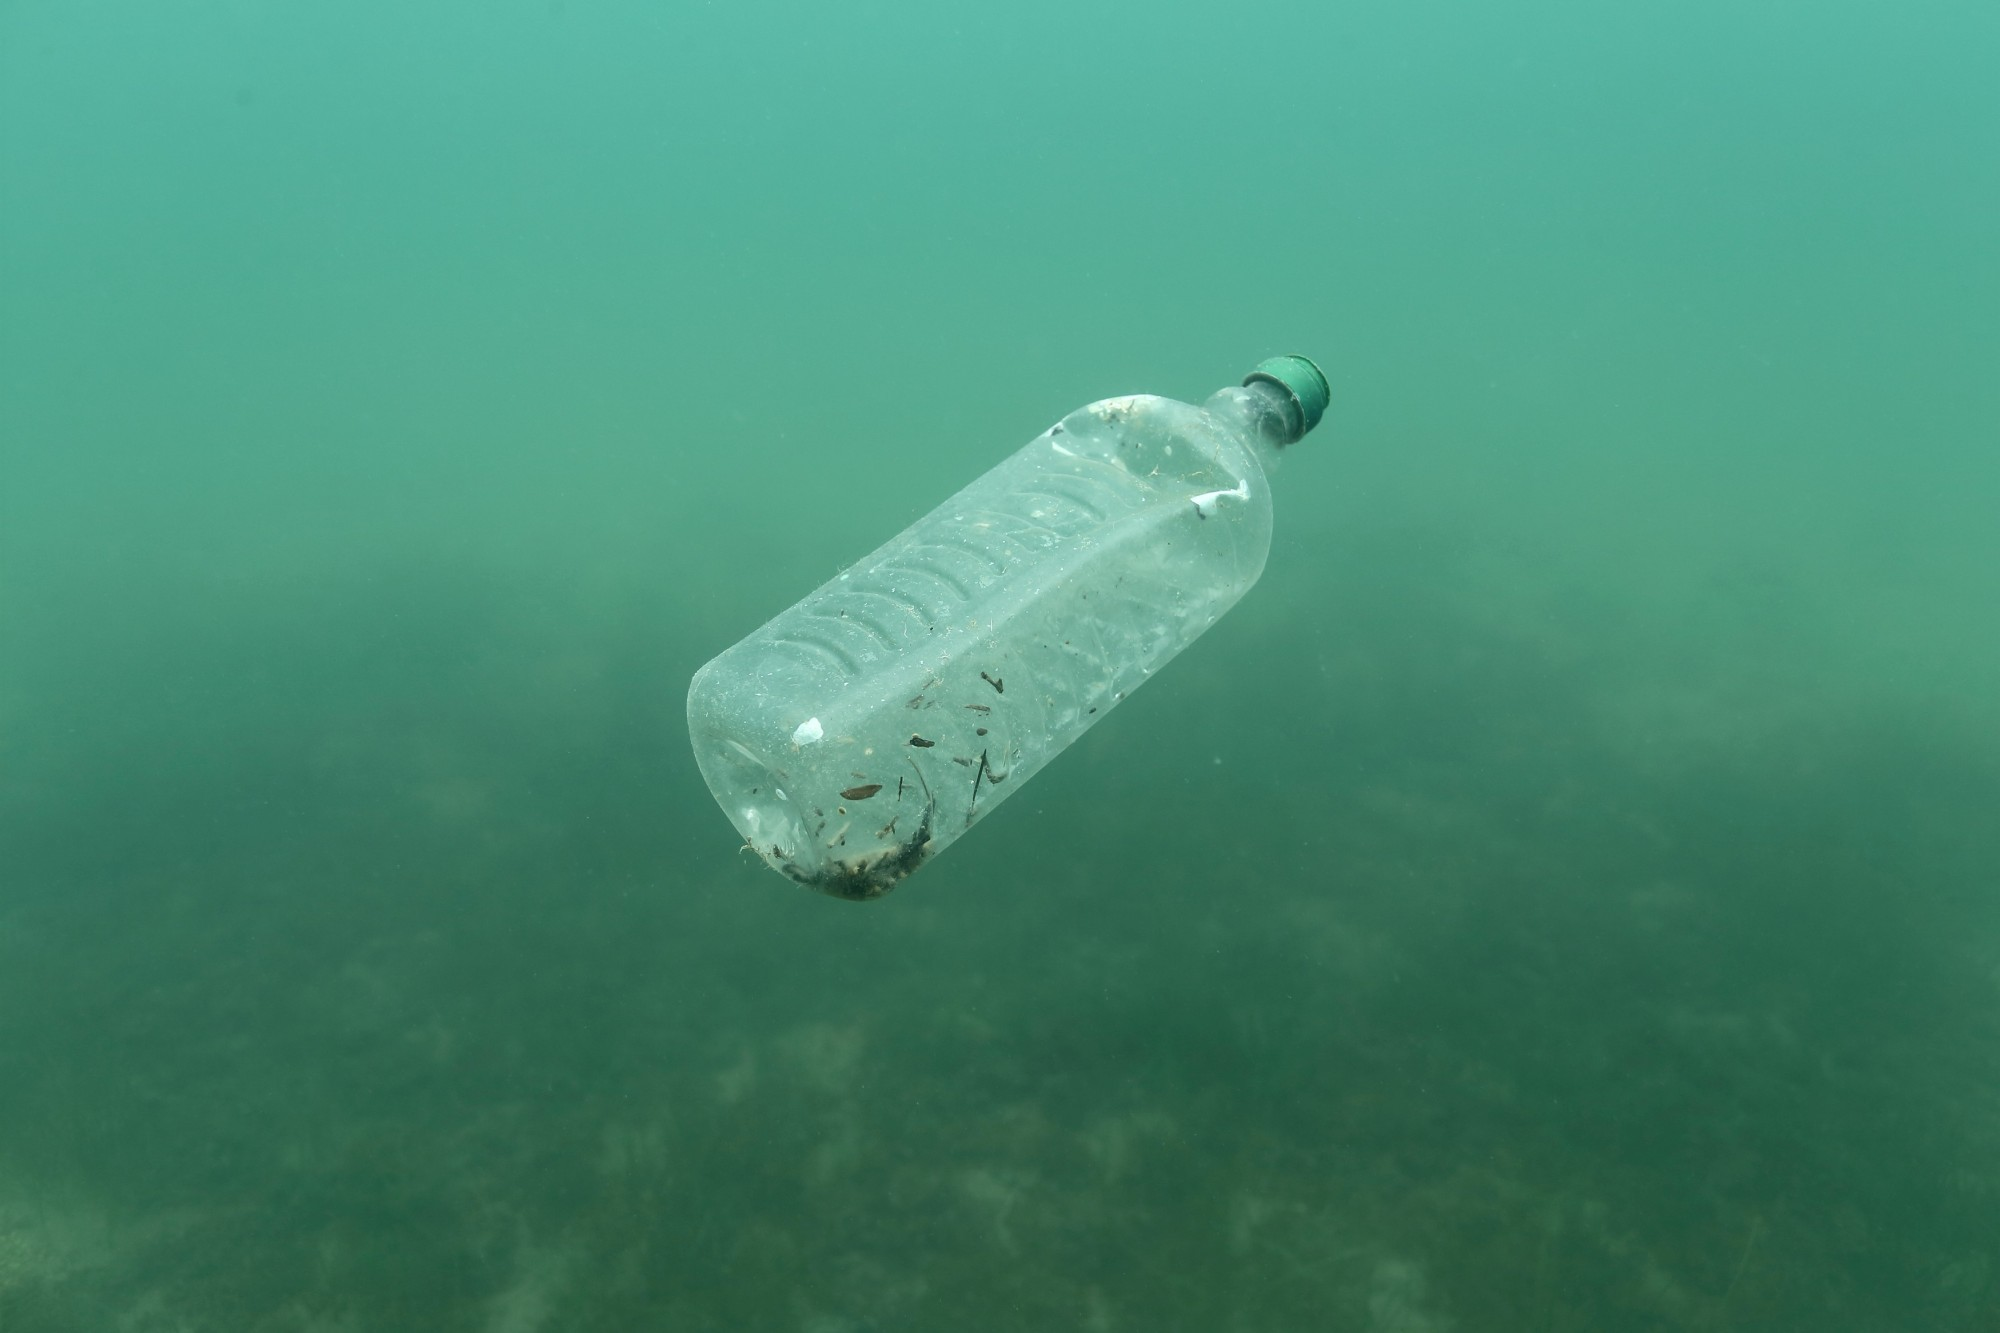

b-plastic-a-20190613.jpg is an e-waste, you can send to collector


In [33]:
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, array_to_img

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(224,224))
  x = array_to_img(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=6)
  
  print("%.2f" % classes[0])
  
  from IPython.display import Image
  display(Image(filename=fn))
  
  if classes[0]>0.5:
    print(fn + " is not an e-waste, you can't send to collector")
    
  else:
    print(fn + " is an e-waste, you can send to collector" )